In [21]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
plt.rcParams['figure.figsize'] = 25, 15
data_path = r'D:\PROJECT_TW\git\data\qrdetect'

# 图片与背景融合

bimg shape : (2048, 1152, 3)


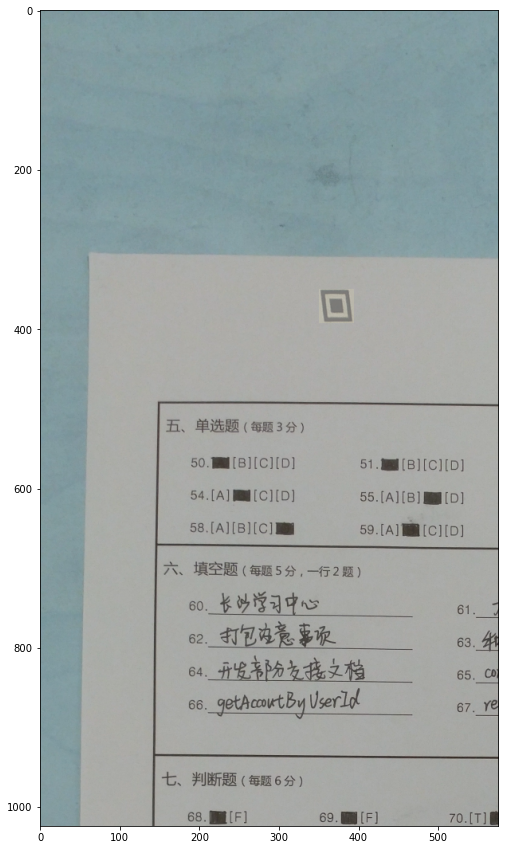

In [47]:
# https://www.jb51.net/article/184488.htm  python使用OpenCV模块实现图像的融合示例代码
# https://blog.csdn.net/fanjiule/article/details/81607873 opencv中addWeighted()函数用法总结
fimg = cv2.imread(join(data_path,'qr','q36.png'), cv2.IMREAD_COLOR)
bimg = cv2.imread(join(data_path,'bg','7.jpg'), cv2.IMREAD_COLOR)
bimg = cv2.resize(bimg,(0,0), fx=2048/bimg.shape[0], fy=2048/bimg.shape[0], interpolation=cv2.INTER_AREA)
print('bimg shape :', bimg.shape)
height, width, _ = bimg.shape
bimg = bimg[0:height//2, 0:width//2,:]
x_pos, y_pos = 350,350
# x_pos, y_pos = 100,100
mix_image = np.ones(fimg.shape, fimg.dtype) 
mix_area_img = bimg[y_pos:y_pos+fimg.shape[0], x_pos:x_pos+fimg.shape[1],:]
mix_image[:,:,0] = np.median(mix_area_img[:,:,0])
mix_image[:,:,1] = np.median(mix_area_img[:,:,1])
mix_image[:,:,2] = np.median(mix_area_img[:,:,2])
mask = np.ones(fimg.shape, np.uint8) * 255
height, width, _ = fimg.shape
center_y =  height//2
center_x =  width//2
center = (center_x,center_y)
# 参数分别为：图1，图1的权重，图2，图2的权重，权重和添加的值为3
fimg = cv2.addWeighted(fimg, 0.4, mix_image, 0.6, 0)
# fimg = cv2.seamlessClone(fimg,mix_image, mask,center, cv2.NORMAL_CLONE)

bimg[y_pos:y_pos+fimg.shape[0], x_pos:x_pos+fimg.shape[1],:] = fimg
plt.imshow(bimg)
plt.show()

# 图片前景做旋转

In [3]:
from math import *
img = cv2.imread(join(data_path,'qr','q1.png'), cv2.IMREAD_COLOR)
# plt.imshow(img)
# plt.show()
degree=3
height,width=img.shape[:2]
heightNew=int(width*fabs(sin(radians(degree)))+height*fabs(cos(radians(degree))))
widthNew=int(height*fabs(sin(radians(degree)))+width*fabs(cos(radians(degree))))

matRotation=cv2.getRotationMatrix2D((width/2,height/2),degree,1)
matRotation[0,2] +=(widthNew-width)/2  #重点在这步，目前不懂为什么加这步
matRotation[1,2] +=(heightNew-height)/2  #重点在这步
imgRotation=cv2.warpAffine(img,matRotation,(widthNew,heightNew),borderValue=(255,255,255))

# plt.imshow(imgRotation)
# plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

# 图片前景做轻微变形

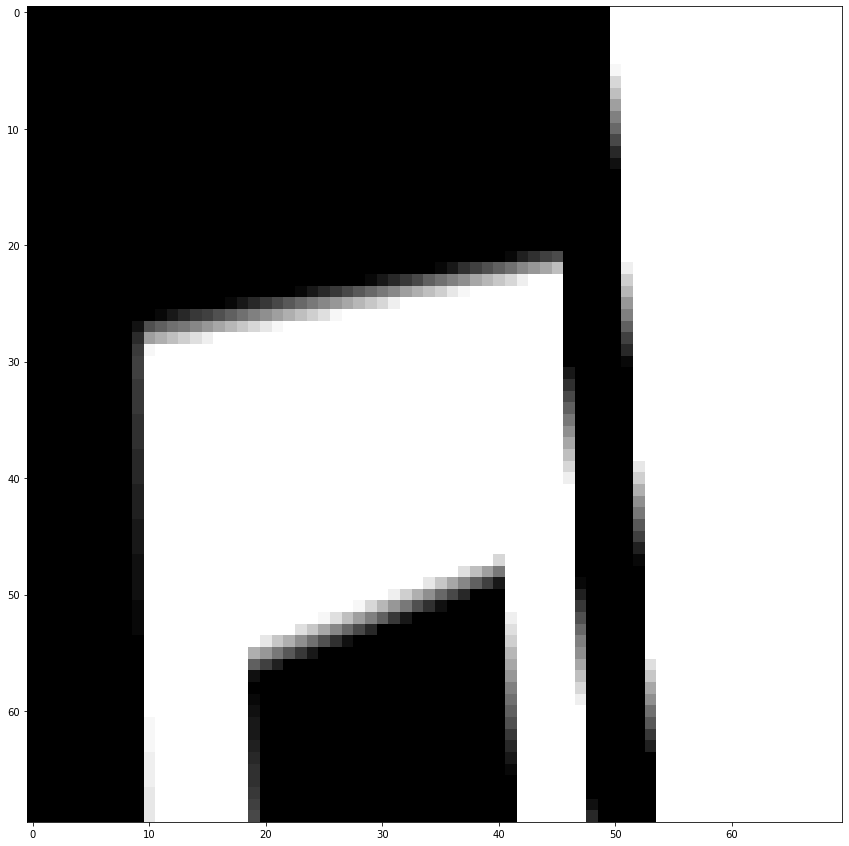

In [75]:
# https://blog.csdn.net/weixin_43848422/article/details/88701017?utm_medium=distribute.pc_relevant.none-task-blog-title-3&spm=1001.2101.3001.4242 Python计算机视觉 图像扭曲（仿射扭曲）
# https://blog.csdn.net/i_chaoren/article/details/78324184 OpenCV—透视变换warpPerspective
im = cv2.imread(join(data_path,'qr','q1.png'), cv2.IMREAD_COLOR)
randomlimit =0.01
perspective = np.eye(3,dtype=np.float32) + np.random.uniform(-randomlimit,randomlimit,(3,3))
perspective[1][1] = 3
im = cv2.warpPerspective(im, perspective, (im.shape[1], im.shape[0]), borderValue=(255,255,255))

plt.imshow(im)
plt.show()


# 图片旋转后，原坐标点计算

before  [115, 574, 200, 652]
after: -1469 , 2972 , -1239 , 3202
before  [3189, 589, 3278, 670]
after: 2898 , -1359 , 3139 , -1118


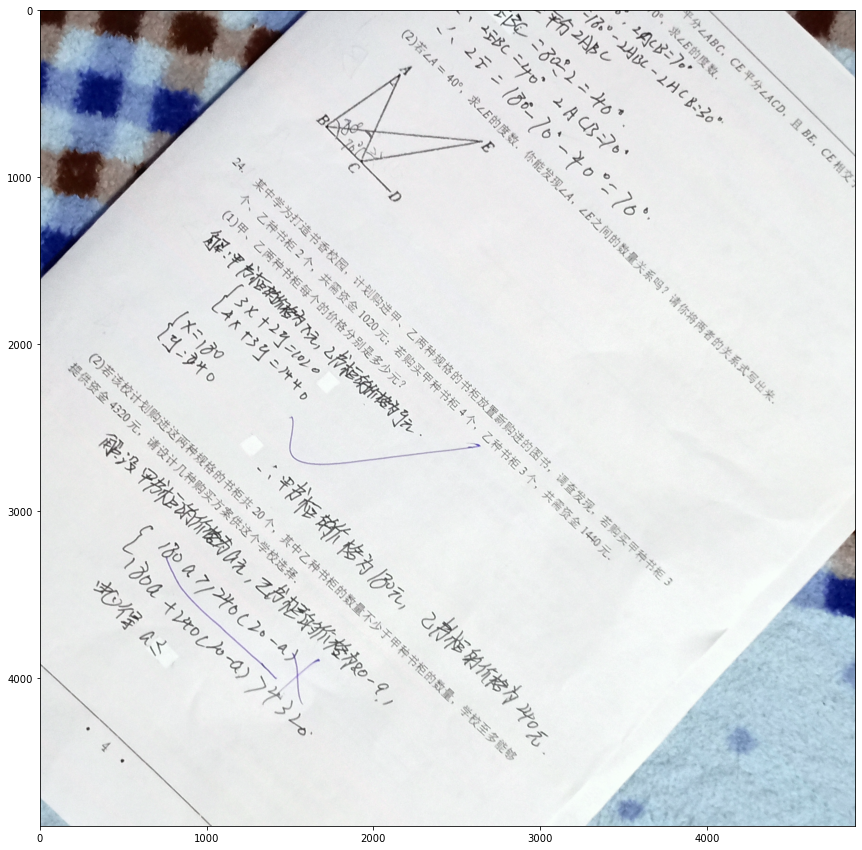

In [32]:
# https://blog.csdn.net/mrr1ght/article/details/89196611  python-opencv 图像平移旋转变换、以及图像旋转前后坐标值映射关系
# https://www.cnblogs.com/Shawnyi/p/10370815.html Python 的NumPy 库中dot()函数详解
# https://blog.csdn.net/windowsyun/article/details/78158747 仿射变换

from os.path import join
img = cv2.imread(join(data_path,'error_imgs','taged','00d78ebc-24ff-42b0-ab46-2250401530b7.jpg'), cv2.IMREAD_COLOR)

degree=45
height,width=img.shape[:2]
heightNew=int(width*fabs(sin(radians(degree)))+height*fabs(cos(radians(degree))))
widthNew=int(height*fabs(sin(radians(degree)))+width*fabs(cos(radians(degree))))

matRotation=cv2.getRotationMatrix2D((width/2,height/2),degree,1)
matRotation[0,2] +=(widthNew-width)/2  #重点在这步，目前不懂为什么加这步
matRotation[1,2] +=(heightNew-height)/2  #重点在这步
imgRotation=cv2.warpAffine(img,matRotation,(widthNew,heightNew),borderValue=(np.median(img[:,:,0]),np.median(img[:,:,1]),np.median(img[:,:,2])))

def get_box_pos(src_pos, map_rotation):
    x0,y0,x1,y1 = src_pos
    _src_pos = [(x0,y0),(x0,y1),(x1,y0),(x1,y1)]
    _pos_x_list = []
    _pos_y_list = []
    for pos in _src_pos:
        x,y = pos
        _x,_y = np.dot(map_rotation, np.array([[x],[y],[1]]))
        _pos_x_list.append(int(_x))
        _pos_y_list.append(int(_y))
    dest_pos = [min(_pos_x_list), min(_pos_y_list), max(_pos_x_list), max(_pos_y_list)]
    return dest_pos

boxes = [[115,574,200,652],[3189,589,3278,670]]
for box in boxes:
    
    print('before ', box)
#     x0,y0 = np.dot(matRotation, np.array([[x0],[y0],[1]]))
#     x1,y1 = np.dot(matRotation, np.array([[x1],[y1],[1]]))
#     _x0,_y0,_x1,_y1 = int(x0), int(y0), int(x1), int(y1)
#     x0,y0 = min(_x0,_x1), min(_y0,_y1)
#     x1,y1 = max(_x0,_x1), max(_y0,_y1)
    x0,y0,x1,y1 = get_box_pos(box, matRotation)
    print('after:', x0, ',', y0, ',', x1, ',', y1)
    cv2.rectangle(imgRotation, (x0,y0), (x1, y1), (0, 255, 0), 5)

plt.imshow(imgRotation)
plt.show()